In [1]:
import pandas as pd
pd.set_option('display.max_column', 250)
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-notebook')
from matplotlib import rcParams
rcParams['figure.figsize'] = (6, 4)
rcParams['figure.dpi'] = 150

In [2]:
files = !cd ../data/GasSensor/; ls *.dat
files = files.sort(nums=True)

In [3]:
files

['batch1.dat',
 'batch2.dat',
 'batch3.dat',
 'batch4.dat',
 'batch5.dat',
 'batch6.dat',
 'batch7.dat',
 'batch8.dat',
 'batch9.dat',
 'batch10.dat']

In [4]:
all_data = pd.DataFrame(columns=range(1,129))

from sklearn.datasets import load_svmlight_file

for f in files:
    X, y = load_svmlight_file('../data/GasSensor/'+f)
    df = pd.DataFrame(X.toarray(), columns=range(1,129))
    df['class'] = y
    df['class'] = df['class'].astype(int)
    all_data = pd.concat([all_data, df])
all_data.reset_index()

/Users/Feranor/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/core/indexes/range.py:465: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  return self._int64index.union(other)


,index,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,class
0,0,15596.1621,1.868245,2.371604,2.803678,7.512213,-2.739388,-3.344671,-4.847512,15326.6914,1.768526,2.269085,2.713374,6.915721,-2.488324,-3.082212,-5.056975,2789.3831,2.754759,0.430440,0.649457,1.795029,-0.426662,-0.584313,-1.438976,2581.5686,2.680623,0.399746,0.605065,1.786704,-0.400115,-0.550743,-1.728611,685.3994,1.682904,0.122736,0.223703,0.584691,-0.138196,-0.236907,-0.781959,797.7738,1.742488,0.152483,0.218904,0.841862,-0.164646,-0.315720,-0.791447,3128.8489,3.605537,0.532422,0.763062,2.118983,-0.557197,-0.809953,-2.344130,3136.8778,3.555169,0.535883,0.761388,1.499244,-0.571480,-0.944425,-2.658358,13540.6738,1.765738,2.006883,2.519022,6.261430,-2.172101,-2.694967,-3.791499,13831.7539,1.746493,2.057165,2.391239,5.695234,-2.350776,-2.888766,-8.129869,3020.9191,2.819354,0.474520,0.723993,2.160130,-0.467900,-0.638167,-1.643650,2185.9741,2.949381,0.342575,0.515090,1.340477,-0.361030,-0.493482,-1.200617,862.7479,1.779291,0.165138,0.246473,1.358106,-0.187465,-0.416382,-1.058061,1059.7562,1.896047,0.198946,0.334017,0.815048,-0.204467,-0.345119,-0.969336,3357.1124,3.860647,0.580818,0.806830,1.729739,-0.619214,-1.071137,-3.037772,3037.0390,3.972203,0.527291,0.728443,1.445783,-0.545079,-0.902241,-2.654529,1.0
1,1,26402.0704,2.532401,5.411209,6.509906,7.658469,-4.722217,-5.817651,-7.518333,23855.7812,2.164706,4.901063,5.971392,6.978131,-4.199424,-5.221090,-7.604863,3882.9057,3.155054,0.802987,1.172245,1.570895,-0.697881,-0.944655,-1.334743,3651.0427,3.130669,0.739278,1.101765,1.428631,-0.659641,-0.915543,-1.334217,982.9490,1.933877,0.233308,0.378052,0.717916,-0.225572,-0.354591,-0.748061,1162.2378,2.039431,0.278337,0.486908,0.840494,-0.271369,-0.473164,-0.718214,4332.1543,3.990162,1.002503,1.586233,1.926608,-0.913245,-1.335612,-1.773328,4387.5284,4.011519,1.009769,1.647830,1.962858,-0.944028,-1.631468,-1.925095,20553.5645,2.108870,4.266941,5.185937,6.398693,-3.636176,-4.497039,-7.464548,22540.1933,2.222146,4.621283,5.573620,6.756039,-3.986434,-4.953663,-6.561748,4240.3011,3.262893,0.887237,1.297617,1.630074,-0.768036,-1.244472,-1.419646,3079.0621,3.399659,0.649639,0.948781,1.369550,-0.598444,-0.820868,-1.081919,1237.0131,2.067927,0.305793,0.558008,0.948564,-0.289557,-0.501078,-1.191404,1459.6356,2.149242,0.361007,0.614619,0.950204,-0.327339,-0.503861,-0.838039,4685.7753,4.277604,1.080629,1.818559,2.237534,-1.004812,-1.530519,-1.994993,4176.4453,4.281373,0.980205,1.628050,1.951172,-0.889333,-1.323505,-1.749225,1.0
2,2,42103.5820,3.454189,8.198175,10.508439,11.611003,-7.668313,-9.478675,-12.230939,37562.3008,2.840403,7.386357,9.511703,12.129657,-6.689464,-8.184333,-10.196169,5476.3898,3.929721,1.132118,1.717418,2.050157,-1.052941,-1.436270,-1.956262,5140.8302,3.880357,1.054304,1.649600,1.964727,-0.995282,-1.377502,-1.844021,1409.2183,2.316449,0.335154,0.572576,0.932730,-0.337312,-0.532147,-1.011991,1647.6780,2.443898,0.405582,0.725644,1.006433,-0.403554,-0.676717,-1.008518,6145.6659,4.998625,1.426344,2.407405,2.856787,-1.377070,-1.994748,-2.445191,6197.3047,4.997810,1.473118,2.545978,3.331699,-1.420663,-2.185120,-2.625092,32366.9336,2.742087,6.419288,8.290210,9.709606,-5.792984,-7.171543,-9.797253,35597.0020,2.916899,6.969954,8.951225,10.413684,-6.441517,-7.914062,-9.973361,5968.8666,4.056138,1.262938,1.935885,2.346947,-1.159097,-1.791556,-2.233596,4409.1721,4.286887,0.917809,1.390353,1.810937,-0.909467,-1.254904,-1.732933,1735.0383,2.466508,0.450574,0.841068,1.808291,-0.426742,-0.711579,-1.129027,2040.1528,2.572696,0.509803,0.932630,1.248513,-0.475471,-0.730332,-1.126488,6630.1836,5.369827,1.567405,2.790448,3.279244,-1.5181

In [5]:
all_data['class'] = all_data['class'].astype(int)

In [6]:
#all_data.to_csv('../data/GasSensor.csv')

In [7]:
import arff
arff.dump('../data/GasSensor.arff', all_data.values, relation='gas')

In [8]:
all_data.shape

(13910, 129)

In [9]:
all_data.groupby('class')['class'].sum()

class
1     2565
2     5852
3     4923
4     7744
5    15045
6    10998
Name: class, dtype: int64

In [10]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13910 entries, 0 to 3599
Columns: 129 entries, 1 to class
dtypes: float64(128), int64(1)
memory usage: 13.8 MB


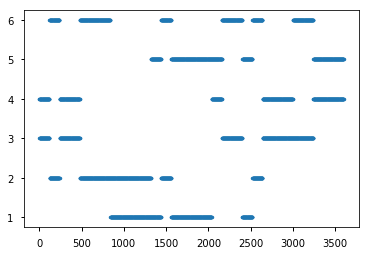

In [13]:
plt.plot(range(len(df)), df['class'], '.')